In [1]:
import pandas as pd
import seaborn as sns

# Dataset

In [2]:
df=pd.read_csv('covid.csv',usecols=['Headline','Sentiment','Description'])
df.head()

,Headline,Sentiment,Description
0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",0,Rajasthan on Wednesday reported 74 new coronav...
1,"Coronavirus cases in Delhi surge to 3,439 afte...",0,The total number of coronavirus cases in Delhi...
2,"Anguished, I'll always recall our interactions...",1,"Condoling the demise of actor Rishi Kapoor, PM..."
3,It's a terrible week for Indian cinema: Rahul ...,0,Congress leader Rahul Gandhi condoled Rishi Ka...
4,Delhi Police perform 'parikrama' of AIIMS to t...,1,As a sign of respect for healthcare profession...


In [3]:
df.shape

(4072, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     4072 non-null   object
 1   Sentiment    4072 non-null   int64 
 2   Description  4072 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.6+ KB


In [5]:
df.describe()

,Sentiment
count,4072.000000
mean,0.326621
std,0.469035
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df.isnull().mean()

Headline       0.0
Sentiment      0.0
Description    0.0
dtype: float64

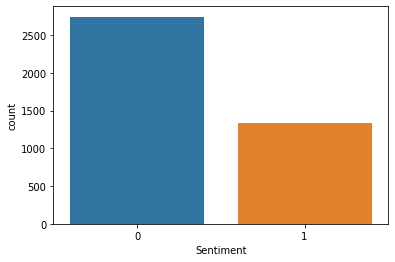

In [7]:
sns.countplot('Sentiment',data=df)

# Dependent and Independent variables

In [8]:
X=df.drop('Sentiment',axis=1)

In [9]:
y=df['Sentiment']

In [10]:
X.head()

,Headline,Description
0,"Coronavirus cases reach 2,438 in Rajasthan; 81...",Rajasthan on Wednesday reported 74 new coronav...
1,"Coronavirus cases in Delhi surge to 3,439 afte...",The total number of coronavirus cases in Delhi...
2,"Anguished, I'll always recall our interactions...","Condoling the demise of actor Rishi Kapoor, PM..."
3,It's a terrible week for Indian cinema: Rahul ...,Congress leader Rahul Gandhi condoled Rishi Ka...
4,Delhi Police perform 'parikrama' of AIIMS to t...,As a sign of respect for healthcare profession...


In [11]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Sentiment, dtype: int64

# Importing required Libraries

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.3.1'

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [15]:
#Vocab size

voc_size=5000
messages=X.copy()

# Data cleaning/preprocessing

In [16]:
#Text data cleaning

import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['Headline'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [17]:
corpus

['coronaviru case reach rajasthan patient recov',
 'coronaviru case delhi surg new case report today',
 'anguish alway recal interact pm modi rishi kapoor death',
 'terribl week indian cinema rahul gandhi rishi kapoor demis',
 'delhi polic perform parikrama aiim thank medic staff',
 'mp govern offic resum work staff',
 'k labour student brought back j k past day amid lockdown',
 'new covid case pune district hour total exce',
 'journalist among new covid case report kerala',
 'maha nashik district report new case includ polic personnel',
 'new case covid karnataka total cross',
 'sanit worker donat month salari telangana cm relief fund',
 'trader delhi azadpur mandi test coronaviru posit',
 'karnataka convert state transport bu mobil fever clinic',
 'us prais india lift export restrict critic medic suppli',
 'test haryana jhajjar district travel delhi',
 'new covid case report rajasthan total case state',
 'new covid case andhra total infect cross',
 'sc refus stay govern central vista

# One Hot representation

In [18]:
#One hot representation

onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[4575, 4964, 1860, 837, 4531, 3006],
 [4575, 4964, 3621, 1556, 2214, 4964, 4946, 258],
 [4642, 2706, 977, 835, 2310, 2057, 2749, 3710, 3346],
 [3007, 975, 2959, 389, 4638, 480, 2749, 3710, 15],
 [3621, 3897, 853, 165, 1202, 4606, 2958, 3813],
 [4927, 4765, 610, 2670, 2896, 3813],
 [3624, 827, 4420, 827, 3447, 2834, 3624, 720, 3557, 2483, 1153],
 [2214, 909, 4964, 2679, 2959, 25, 881, 4406],
 [2269, 1995, 2214, 909, 4964, 4946, 3840],
 [4705, 1191, 2959, 4946, 2214, 4964, 2313, 3897, 2956],
 [2214, 4964, 909, 2677, 881, 2108],
 [3483, 1653, 935, 2097, 4577, 4533, 1319, 1161, 2133],
 [1224, 3621, 1026, 2724, 3473, 4575, 4234],
 [2677, 2153, 1666, 4047, 2537, 3646, 4220, 2832],
 [18, 4994, 3476, 2531, 2607, 2668, 2469, 2958, 2561],
 [3473, 390, 3621, 2959, 2913, 3621],
 [2214, 909, 4964, 4946, 837, 881, 4964, 1666],
 [2214, 909, 4964, 2365, 881, 4766, 2108],
 [1216, 3376, 2710, 4765, 4848, 2890, 1738, 3621],
 [3538, 4013, 2046, 2955, 621, 3799, 256, 1367, 1193],
 [3476, 4520, 1717, 4915,

# Embedding Layer

In [19]:
#Embedding representation

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [20]:
print(embedded_docs)

[[   0    0    0 ...  837 4531 3006]
 [   0    0    0 ... 4964 4946  258]
 [   0    0    0 ... 2749 3710 3346]
 ...
 [   0    0    0 ... 2427 4133 3099]
 [   0    0    0 ... 4734 4528  960]
 [   0    0    0 ... 1991 3083 4239]]


In [21]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 4575, 4964, 1860,  837, 4531, 3006])

# Model using RNN/LSTM and Dropout Regularization

In [22]:
#creating model

from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
#training

import numpy as np

X_final=np.array(embedded_docs)
y_final=np.array(y)

# Train Test Split

In [24]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
43/43 [==============================] - 4s 87ms/step - loss: 0.6390 - accuracy: 0.6606 - val_loss: 0.6185 - val_accuracy: 0.6860
Epoch 2/10
43/43 [==============================] - 3s 65ms/step - loss: 0.5368 - accuracy: 0.7053 - val_loss: 0.4862 - val_accuracy: 0.7708
Epoch 3/10
43/43 [==============================] - 3s 67ms/step - loss: 0.3739 - accuracy: 0.8347 - val_loss: 0.4369 - val_accuracy: 0.7939
Epoch 4/10
43/43 [==============================] - 3s 68ms/step - loss: 0.3001 - accuracy: 0.8743 - val_loss: 0.4402 - val_accuracy: 0.7969
Epoch 5/10
43/43 [==============================] - 3s 68ms/step - loss: 0.2428 - accuracy: 0.9058 - val_loss: 0.4723 - val_accuracy: 0.8006
Epoch 6/10
43/43 [==============================] - 3s 62ms/step - loss: 0.2012 - accuracy: 0.9234 - val_loss: 0.4996 - val_accuracy: 0.7753
Epoch 7/10
43/43 [==============================] - 2s 56ms/step - loss: 0.1776 - accuracy: 0.9344 - val_loss: 0.6108 - val_accuracy: 0.7783
Epoch 8/10
43

# Metrics

In [26]:
#metrics

y_pred=model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7760416666666666


In [27]:
df['Sentiment'].value_counts()

0    2742
1    1330
Name: Sentiment, dtype: int64